In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [3]:
import tensorflow as tf

# Check if TensorFlow can detect a GPU
gpu_device_name = tf.test.gpu_device_name()

if gpu_device_name:
    print('GPU device found:', gpu_device_name)
else:
    print("No GPU available. Using CPU instead.")


GPU device found: /device:GPU:0


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AML/A1/df_syn_train_0_0_.csv")

In [ ]:
df.head()

,Open_n_val,High_n_val,Low_n_val,Close_n_val,Volume_n_val,SMA_10_val,SMA_20_val,CMO_14_val,High_n-Low_n_val,Open_n-Close_n_val,...,Open_n-Close_n_changelen_val,SMA_20-SMA_10_changelen_val,Close_n_slope_3_changelen_val,Close_n_slope_5_changelen_val,Close_n_slope_10_changelen_val,row_num,day,era,target_10_val,target_5_val
0,0.5,0.5,0.5,0.5,0.0,0.5,0.25,1.0,1.0,0.5,...,0.50,0.75,0.25,0.75,0.50,75,537,2,0.75,0.75
1,0.5,0.5,0.5,0.5,0.0,0.5,0.50,1.0,1.0,0.5,...,0.50,0.50,0.75,0.50,0.50,76,537,2,0.75,0.75
2,0.5,0.5,0.5,0.5,0.0,0.5,0.50,1.0,1.0,0.5,...,0.50,0.25,0.50,0.50,0.75,77,537,2,0.75,0.75
3,0.5,0.5,0.5,0.5,0.0,0.5,0.50,1.0,1.0,0.5,...,0.25,0.25,0.50,0.75,0.50,78,537,2,0.75,0.75
4,0.5,0.5,0.5,0.5,0.0,0.5,0.50,1.0,1.0,0.5,...,0.75,0.25,0.50,0.50,0.50,79,537,2,0.75,0.75


In [ ]:
df.shape

(7800, 29)

In [ ]:
df.columns

Index(['Open_n_val', 'High_n_val', 'Low_n_val', 'Close_n_val', 'Volume_n_val',
       'SMA_10_val', 'SMA_20_val', 'CMO_14_val', 'High_n-Low_n_val',
       'Open_n-Close_n_val', 'SMA_20-SMA_10_val', 'Close_n_slope_3_val',
       'Close_n_slope_5_val', 'Close_n_slope_10_val', 'Open_n_changelen_val',
       'High_n_changelen_val', 'Low_n_changelen_val', 'Close_n_changelen_val',
       'High_n-Low_n_changelen_val', 'Open_n-Close_n_changelen_val',
       'SMA_20-SMA_10_changelen_val', 'Close_n_slope_3_changelen_val',
       'Close_n_slope_5_changelen_val', 'Close_n_slope_10_changelen_val',
       'row_num', 'day', 'era', 'target_10_val', 'target_5_val'],
      dtype='object')

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.head(10)

,Open_n_val,High_n_val,Low_n_val,Close_n_val,Volume_n_val,SMA_10_val,SMA_20_val,CMO_14_val,High_n-Low_n_val,Open_n-Close_n_val,...,Open_n-Close_n_changelen_val,SMA_20-SMA_10_changelen_val,Close_n_slope_3_changelen_val,Close_n_slope_5_changelen_val,Close_n_slope_10_changelen_val,row_num,day,era,target_10_val,target_5_val
5907,0.50,0.50,0.75,0.75,0.0,0.00,0.25,0.75,0.00,0.00,...,0.50,0.50,0.75,0.75,0.75,132,537,18,0.00,1.00
1594,1.00,1.00,1.00,1.00,0.0,1.00,1.00,1.00,1.00,0.50,...,1.00,1.00,0.00,0.00,0.00,109,543,5,0.25,0.50
4028,0.75,0.75,0.75,0.75,0.0,0.75,0.50,0.75,0.75,0.25,...,0.75,0.00,0.25,0.25,0.25,138,540,12,0.25,0.25
6432,0.00,0.00,0.00,0.00,0.0,0.25,0.75,0.25,0.00,0.00,...,0.25,0.75,0.75,0.75,0.75,137,551,18,1.00,1.00
5003,0.00,0.00,0.00,0.00,0.0,0.00,0.75,0.25,0.25,1.00,...,0.25,1.00,0.75,0.75,0.75,138,549,15,1.00,1.00
6948,0.00,0.00,0.00,0.00,0.0,1.00,1.00,0.25,0.00,1.00,...,0.50,0.50,0.50,0.25,0.25,133,549,19,1.00,1.00
5863,0.00,0.00,0.00,0.00,0.0,0.25,0.00,0.25,0.25,1.00,...,0.25,0.75,0.50,0.75,0.25,88,537,18,1.00,1.00
3670,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.75,0.25,0.00,...,0.00,0.00,1.00,1.00,1.00,105,549,10,1.00,1.00
2033,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.25,0.25,1.00,...,0.00,1.00,1.00,1.00,0.75,93,540,7,0.00,0.00
2709,0.75,0.75,0.75,0.75,0.0,0.75,0.50,1.00,0.50,0.25,...,0.75,0.00,0.25,0.25,0.50,119,540,9,0.75,0.75


In [ ]:
# Separate features and target variable
X = df.drop(['era', 'target_10_val', 'target_5_val'], axis=1)
y = df['era']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape, y_train.shape

((6240, 26), (6240,))

In [ ]:
X_test.shape, y_test.shape

((1560, 26), (1560,))

# ZERO NOISE

In [ ]:
# Initialize and train the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(200, 150, 50, 25), max_iter=10000,  random_state=21,tol=0.000000001)
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 150, 50, 25), max_iter=10000,
              random_state=21, tol=1e-09)

In [ ]:
# Predict the training and testing labels
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_accuracy, test_accuracy

(0.8488782051282051, 0.8512820512820513)

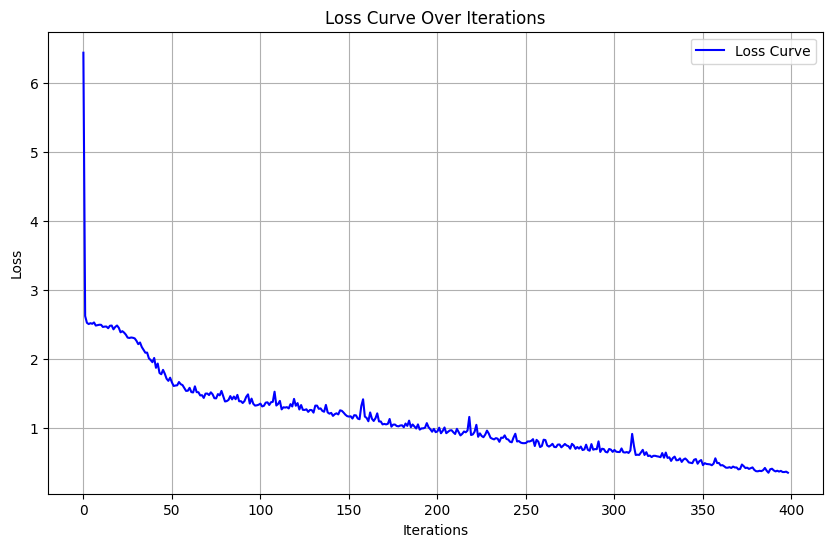

In [ ]:
# Get the training history (loss curve)
loss_curve = clf.loss_curve_

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(loss_curve, label='Loss Curve', color='blue')
plt.title('Loss Curve Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

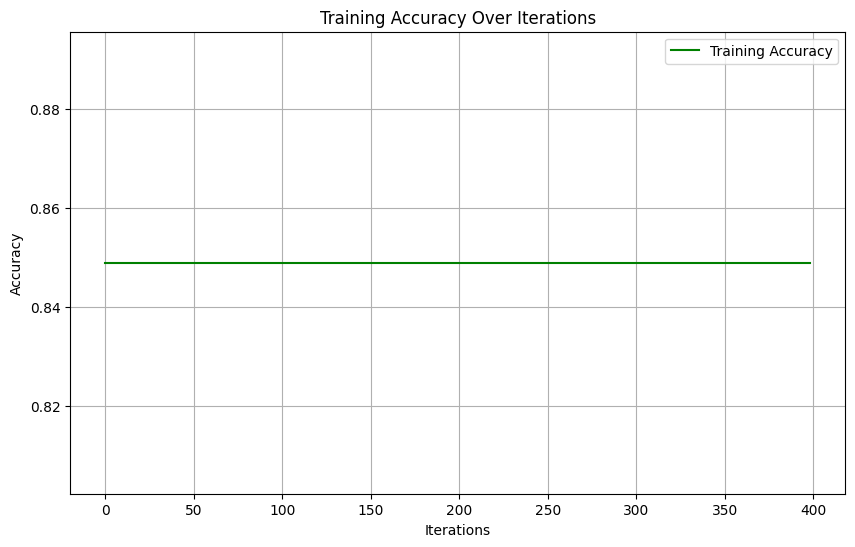

In [ ]:
# Track accuracy during training
train_accuracies = []
for i in range(clf.n_iter_):
    # Get predictions on training set at each iteration
    train_predictions = clf.predict(X_train)
    # Calculate accuracy
    train_accuracy = np.mean(train_predictions == y_train)
    train_accuracies.append(train_accuracy)

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(range(clf.n_iter_), train_accuracies, label='Training Accuracy', color='green')
plt.title('Training Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# LOW NOISE

In [4]:
df2 = pd.read_csv("/content/drive/MyDrive/AML/A1/df_synA_train_shuffled.csv")

In [5]:
df2.head()

,Open_n_val,High_n_val,Low_n_val,Close_n_val,Volume_n_val,SMA_10_val,SMA_20_val,CMO_14_val,High_n-Low_n_val,Open_n-Close_n_val,...,SMA_20-SMA_10_changelen_val,Close_n_slope_3_changelen_val,Close_n_slope_5_changelen_val,Close_n_slope_10_changelen_val,row_num,day,era,target_10_val,target_5_val,data_type
0,1.00,0.75,0.75,0.75,0.0,0.75,0.50,0.75,0.25,1.00,...,0.00,0.0,0.00,0.25,82,481,16,0.00,0.00,train
1,0.25,0.25,0.50,0.50,0.0,0.50,0.50,0.00,0.25,0.00,...,0.75,0.5,0.25,0.75,77,542,23,0.25,0.25,train
2,0.75,0.75,0.75,0.75,0.0,0.75,0.50,0.75,0.75,0.50,...,0.50,0.5,0.75,0.75,123,445,8,0.75,0.25,train
3,0.75,0.75,0.75,1.00,0.0,0.75,1.00,0.75,0.00,0.25,...,1.00,0.5,1.00,0.75,112,486,1,0.25,0.25,train
4,1.00,1.00,1.00,1.00,0.0,1.00,0.75,0.75,0.25,1.00,...,0.75,0.0,0.00,0.00,86,390,14,0.00,0.00,train


In [6]:
df2.shape

(312000, 30)

In [7]:
print(df2['data_type'].value_counts())

train    312000
Name: data_type, dtype: int64


In [8]:
# Separate features and target variable
X = df2.drop(['era', 'target_10_val', 'target_5_val', 'data_type'], axis=1)
y = df2['era']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the MLP classifier
clf2 = MLPClassifier(hidden_layer_sizes=(250, 150, 100, 50), max_iter=5000,  random_state=21,tol=0.000000001)
clf2.fit(X_train, y_train)

In [1]:
# Predict the training and testing labels
y_train_pred = clf2.predict(X_train)
y_test_pred = clf2.predict(X_test)

# Calculate the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_accuracy, test_accuracy

(0.7488782051282051, 0.7512820512820513)

# HIGH NOISE

In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/AML/A1/df_synA_test_hard_shuffled_sample.csv")

In [ ]:
df3 = df3.sample(frac = 1)

In [ ]:
df3.head()

,Open_n_val,High_n_val,Low_n_val,Close_n_val,Volume_n_val,SMA_10_val,SMA_20_val,CMO_14_val,High_n-Low_n_val,Open_n-Close_n_val,...,SMA_20-SMA_10_changelen_val,Close_n_slope_3_changelen_val,Close_n_slope_5_changelen_val,Close_n_slope_10_changelen_val,row_num,day,era,target_10_val,target_5_val,data_type
203305,0.50,0.50,0.50,0.50,0.0,0.50,0.50,0.75,1.00,0.50,...,1.00,0.50,0.25,1.00,123,471,0,0.75,0.50,validation
78904,0.00,0.00,0.00,0.00,0.0,0.25,1.00,0.25,0.25,1.00,...,1.00,0.75,0.75,0.00,98,422,14,1.00,0.00,validation
220092,0.75,0.75,0.50,0.25,0.0,0.50,0.25,0.50,1.00,0.75,...,0.25,0.25,0.50,0.50,135,500,3,0.75,1.00,validation
199870,0.75,0.75,0.25,0.75,0.0,0.25,0.25,0.75,1.00,0.50,...,0.75,0.50,0.50,0.25,97,544,1,0.00,0.25,validation
25921,0.50,0.50,0.75,1.00,0.0,0.75,0.75,1.00,0.25,0.00,...,0.50,0.50,0.25,0.50,122,486,0,0.00,0.00,validation


In [ ]:
# Separate features and target variable
X = df3.drop(['era', 'target_10_val', 'target_5_val', 'data_type'], axis=1)
y = df3['era']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the MLP classifier
clf3 = MLPClassifier(hidden_layer_sizes=(250, 150, 100, 50), max_iter=3000,  random_state=21,tol=0.000000001)
clf3.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(250, 150, 100, 50), max_iter=3000,
              random_state=21, tol=1e-09)

In [ ]:
# Predict the training and testing labels
y_train_pred = clf3.predict(X_train)
y_test_pred = clf3.predict(X_test)

# Calculate the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_accuracy, test_accuracy

(0.5882962740384615, 0.5764423076923076)

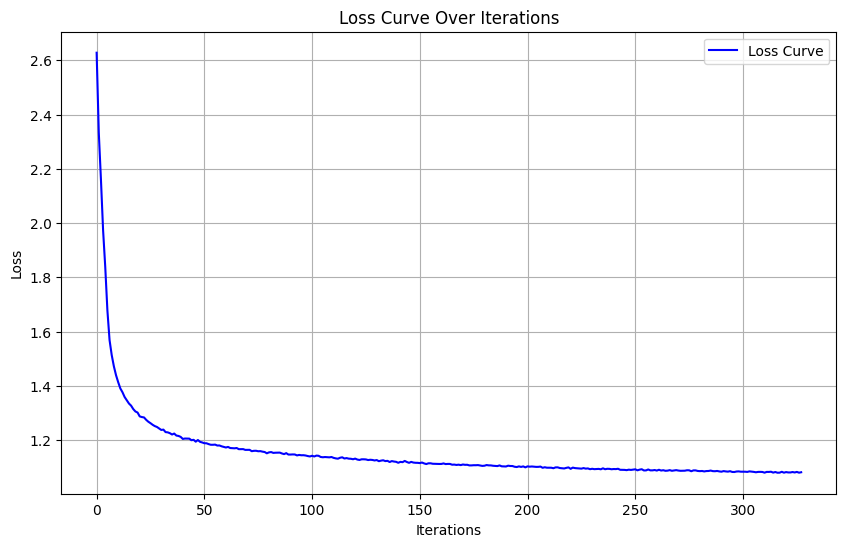

In [ ]:
# Get the training history (loss curve)
loss_curve = clf3.loss_curve_

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(loss_curve, label='Loss Curve', color='blue')
plt.title('Loss Curve Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Track accuracy during training
train_accuracies = []
for i in range(clf3.n_iter_):
    # Get predictions on training set at each iteration
    train_predictions = clf3.predict(X_train)
    # Calculate accuracy
    train_accuracy = np.mean(train_predictions == y_train)
    train_accuracies.append(train_accuracy)

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(range(clf3.n_iter_), train_accuracies, label='Training Accuracy', color='green')
plt.title('Training Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()